In [180]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [181]:
df = pd.read_excel('C:\\Users\\Adela\\precio_pan_deflactado.xlsx')
df=df.round(2)
df['Mes'] = df['Mes'].replace({
    "Enero":"January","Enero " :"January",
    'Febrero': 'February',"Marzo":"March",
    'Abril': 'April',"Mayo":"May","Junio":"June","Julio":"July","Agosto":"August",
    "Septiembre":"September","Octubre":"October","Noviembre":"November","Diciembre":"December"
})

In [182]:
df['month_number'] = pd.to_datetime(df['Mes'], format='%B').dt.month
df['month_year'] = df['month_number'].astype(str).str.zfill(2) + '/' + df["Año"].astype(str)
df['Precio deflactado'] = df['Precio deflactado'].replace({"-":38.64})
df["month_year"]=pd.to_datetime(df["month_year"], format="%m/%Y")
df["Precio deflactado"]=df["Precio deflactado"].round(2)
df

C:\Users\Adela\AppData\Local\Temp\ipykernel_24632\647864484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Precio deflactado'] = df['Precio deflactado'].replace({"-":38.64})


,Año,Mes,Pan francés(kg),IPC mensual,Índice IPC,IPC (base junio 2017 = 100),Precio deflactado,month_number,month_year
0,2017,June,38.64,-,100.00,100,38.64,6,2017-06-01
1,2017,July,39.12,1.7,101.70,100,38.47,7,2017-07-01
2,2017,August,39.43,1.4,103.12,100,38.24,8,2017-08-01
3,2017,September,39.71,1.9,105.08,100,37.79,9,2017-09-01
4,2017,October,39.89,1.5,106.66,100,37.40,10,2017-10-01
...,...,...,...,...,...,...,...,...,...
89,2024,November,3040.97,2.4,6678.45,100,45.53,11,2024-11-01
90,2024,December,3095.49,2.7,6858.77,100,45.13,12,2024-12-01
91,2025,January,3154.17,2.2,7009.66,100,45.00,1,2025-01-01
92,2025,February,3212.93,2.4,7177.89,100,44.76,2,2025-02-01


Text(0.5, 1.0, 'Diciembre-Abril , 2017-2025')

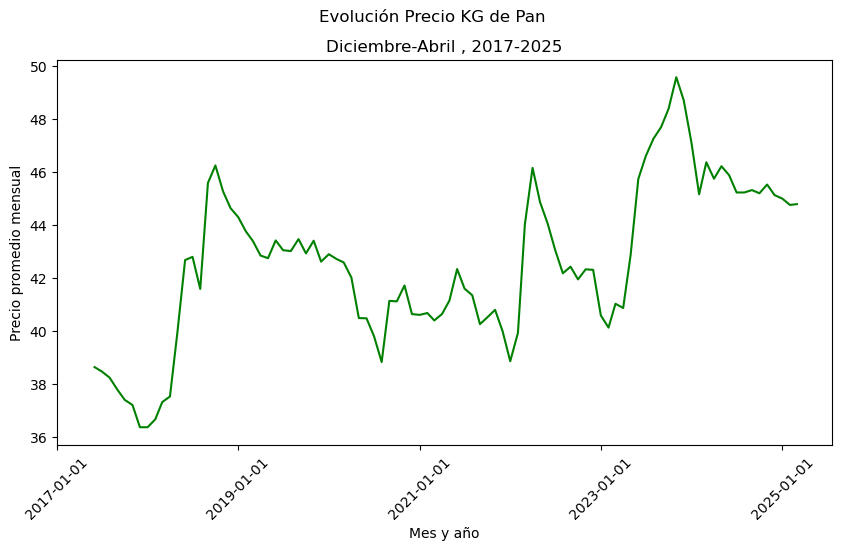

In [183]:
plt.figure(figsize=(10, 5))
plt.plot(df['month_year'], df["Precio deflactado"], linestyle='-', color='green')
plt.xticks(ticks=plt.xticks()[0][::2])
plt.xticks(rotation=45)
plt.suptitle('Evolución Precio KG de Pan')
plt.xlabel('Mes y año')
plt.ylabel('Precio promedio mensual')
plt.title('Diciembre-Abril , 2017-2025')

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
df["precio_1"] = df["Precio deflactado"].shift(1, fill_value=0)
df["precio_2"] = df["Precio deflactado"].shift(2, fill_value=0)
df["precio_3"] = df["Precio deflactado"].shift(3, fill_value=0)
df["precio_4"] = df["Precio deflactado"].shift(4, fill_value=0)
df["precio_5"] = df["Precio deflactado"].shift(5, fill_value=0)
df['intercepto'] = 1
df["precio_1"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
df["Precio deflactado"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
x=df[["precio_1","precio_2","precio_3","precio_4","precio_5","intercepto"]]
y=df[["Precio deflactado"]]
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Precio deflactado   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     12.56
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           3.28e-09
Time:                        04:12:14   Log-Likelihood:                -209.49
No. Observations:                  94   AIC:                             431.0
Df Residuals:                      88   BIC:                             446.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
precio_1       0.3088      0.076      4.079      0.0

C:\Users\Adela\AppData\Local\Temp\ipykernel_24632\410564188.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["precio_1"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
C:\Users\Adela\AppData\Local\Temp\ipykernel_24632\410564188.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,Año,Mes,Pan francés(kg),IPC mensual,Índice IPC,IPC (base junio 2017 = 100),Precio deflactado,month_number,month_year,precio_1,precio_2,precio_3,precio_4,precio_5,intercepto
0,2017,June,38.64,-,100.00,100,38.64,6,2017-06-01,0.00,0.00,0.00,0.00,0.00,1
1,2017,July,39.12,1.7,101.70,100,38.47,7,2017-07-01,38.64,0.00,0.00,0.00,0.00,1
2,2017,August,39.43,1.4,103.12,100,38.24,8,2017-08-01,38.47,38.64,0.00,0.00,0.00,1
3,2017,September,39.71,1.9,105.08,100,37.79,9,2017-09-01,38.24,38.47,38.64,0.00,0.00,1
4,2017,October,39.89,1.5,106.66,100,37.40,10,2017-10-01,37.79,38.24,38.47,38.64,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2024,November,3040.97,2.4,6678.45,100,45.53,11,2024-11-01,45.20,45.32,45.23,45.23,45.88,1
90,2024,December,3095.49,2.7,6858.77,100,45.13,12,2024-12-01,45.53,45.20,45.32,45.23,45.23,1
91,2025,January,3154.17,2.2,7009.66,100,45.00,1,2025-01-01,45.13,45.53,45.20,45.32,45.23,1
92,2025,February,3212.93,2.4,7177.89,100,44.76,2,2025-02-01,45.00,45.13,45.53,45.20,45.32,1


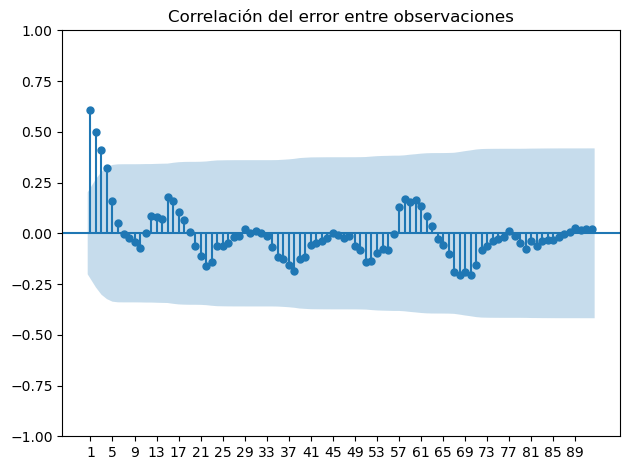

In [185]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

residuals = results.resid

fig, ax = plt.subplots()
plot_acf(residuals.squeeze(), lags=92, ax=ax, zero=False)
ax.set_xticks(range(1, 92, 4))
ax.set_title('Correlación del error entre observaciones',fontsize=12)
plt.tight_layout()
plt.savefig("correlograma.png", dpi=300)
df

In [194]:
estacionalidad= ["June","July", "August", "September", "October", "November", "December",
    "January", "February", "March"][:8] 
df["tendencia"] = range(1, 95) 
df["estacionalidad"] = df["Mes"].isin(estacionalidad).astype(int)
df['precio_1'] = pd.to_numeric(df['precio_1'], errors='coerce') 
df['precio_2'] = pd.to_numeric(df['precio_2'], errors='coerce')
df['precio_3'] = pd.to_numeric(df['precio_3'], errors='coerce')
df['precio_4'] = pd.to_numeric(df['precio_4'], errors='coerce')
df['precio_5'] = pd.to_numeric(df['precio_5'], errors='coerce')
df.loc[:, 'precio_real_pan'] = pd.to_numeric(df['Precio deflactado'], errors='coerce')



In [257]:
X = pd.concat([df[["precio_1", "precio_2","precio_3","precio_4","precio_5","estacionalidad", "tendencia"]]], axis=1)
y = df['Precio deflactado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
# Estandarizamos las variables
#ESTANDARIZACION
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_transformed= pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Estandarizamos las observaciones de test
X_test_transformed= pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)
#ESTANDARIZACION
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
# --- For X_train ---
columns_to_scale_train = X_train.drop(columns=["estacionalidad"]).columns
columns_to_keep_train = ["estacionalidad"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale_train])
X_train_final = np.hstack([X_train_scaled, X_train[columns_to_keep_train].values])

# --- For X_test ---
columns_to_scale_test = X_test.drop(columns=["estacionalidad"]).columns
columns_to_keep_test = ["estacionalidad"]

X_test_scaled = scaler.transform(X_test[columns_to_scale_test])
X_test_final = np.hstack([X_test_scaled, X_test[columns_to_keep_test].values])

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
alphas = np.logspace(-4, 4, 100)
ridgecv = RidgeCV(alphas=alphas, cv=10).fit(X_train_final, y_train)
print("El mejor alpha:", ridgecv.alpha_)
# Ahora con el alpha óptimo, volvemos a estimar nuestro modelo
ridge = ridgecv.fit(X_train_final, y_train)
ridge_pred = ridgecv.predict(X_test_final)
ecm_ridge = mean_squared_error(y_test, ridge_pred)
print("Mean Squared Error de testeo (MSE test):", ecm_ridge.round(2))   

print("Coeficientes del mejor modelo:")
ridge.coef_

El mejor alpha: 138.48863713938746
Mean Squared Error de testeo (MSE test): 3.76
Coeficientes del mejor modelo:


array([0.31102407, 0.22770013, 0.17247517, 0.12446342, 0.1800633 ,
       0.39321341, 0.07959043])

In [259]:
alpha = 0
print("Alpha:", alpha)

ridge_a0 = Ridge(alpha = alpha)
ridge_a0.fit(X_train_final, y_train)             
pred_a0 = ridge_a0.predict(X_test_final)
mse_a0 = mean_squared_error(y_test, pred_a0)

print("Mean Squared Error de testeo (MSE test): ", mse_a0.round(2))   
print("Coeficientes del modelo:")
ridge_a0.coef_

Alpha: 0
Mean Squared Error de testeo (MSE test):  63.52
Coeficientes del modelo:


array([ 4.74678103, -1.24920591,  1.57449262, -4.2976032 ,  0.27225495,
        1.32872588,  0.0876578 ])

In [251]:
X_train_const = sm.add_constant(X_train_final)
X_test_const = sm.add_constant(X_test_final)

# Fit OLS model
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# Predict on test set
y_test_pred = results.predict(X_test_const)

In [211]:
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

63.5164752561305


In [201]:
y_test_pred

34    42.179804
91    45.172700
3     65.897828
35    41.533117
19    41.331291
66    43.940804
63    42.065057
41    42.611261
44    42.212909
71    43.639913
39    40.984704
79    45.784810
1     64.053646
75    47.589770
60    46.650240
14    44.117896
85    44.726783
56    41.701125
48    42.870000
42    44.409271
53    42.345768
21    40.816104
6     39.396628
26    41.897155
38    40.505655
59    47.706216
50    43.184516
87    44.676546
2     55.958663
dtype: float64

In [219]:
ridge_pred

array([42.67328634, 43.96428679, 39.94543999, 42.6359352 , 42.8565819 ,
       43.13582715, 43.2989028 , 42.47704694, 42.51908556, 42.90219123,
       42.37588314, 44.31689293, 37.38466017, 43.75302773, 43.24471049,
       42.15079994, 43.97927077, 42.51703694, 42.62492274, 42.55191906,
       42.73438735, 42.77653407, 41.52792541, 42.68935546, 42.4822059 ,
       43.02415369, 42.7566363 , 43.95077112, 38.85000401])

In [220]:
y_test

34    42.02
91    45.00
3     37.79
35    40.49
19    44.30
66    42.31
63    42.43
41    41.72
44    40.68
71    42.87
39    41.14
79    47.12
1     38.47
75    47.70
60    44.05
14    41.59
85    45.23
56    39.93
48    42.34
42    40.64
53    40.80
21    43.40
6     36.37
26    43.02
38    38.83
59    44.87
50    41.35
87    45.32
2     38.24
Name: Precio deflactado, dtype: float64